# IMPORTING LIBRARIES

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
from sklearn import tree
%matplotlib inline
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
from sklearn.model_selection import cross_val_score
import math
pd.set_option('display.max_columns', 200)

In [ ]:
### NECESSARY IF USING GOOGLECOLAB

# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


# LOADING DATA & PREPROCESSING

## DATA LOADING

In [ ]:
### UPLOAD RAW DATA FROM LOCATION STORED

Exp_Data = pd.read_csv("location//DI_Elbow_Mix_2Phase_Data.csv")  ### CHANGE TO LOCATION OF RAW DATA AS REQUIRED
Exp_Data.head()

,Count,Geometry,Phase,Orientation,Angle,r/D,L/D,H/D,Froude_No,Fluid_Reynolds,Archimedes_No,Stokes_No,Particle_Reynolds,Diameter_Ratio,Density_Ratio,Hardness,Volume_Fraction,Particle_Sharpness,Erosion_Ratio(mm/kg),-20%,+20%,Reference
0,1,Elbow,Gas-solid,H-V,90,1.5,336.0,0.0,314.475354,767503.333333,16345.312312,10812.235710,8309.583333,0.010827,0.000462,4.967956,0.000253,1,0.232,0.1856,0.2784,Bourgoyne (1989)
1,2,Elbow,Gas-solid,H-V,90,1.5,336.0,0.0,290.393908,708730.555556,16345.312312,9984.271714,7673.263889,0.010827,0.000462,5.826074,0.000346,1,0.209,0.1672,0.2508,Bourgoyne (1989)
2,3,Elbow,Gas-solid,H-V,90,1.5,336.0,0.0,287.560797,701816.111111,16345.312312,9886.864185,7598.402778,0.010827,0.000462,5.941439,0.000272,1,0.262,0.2096,0.3144,Bourgoyne (1989)
3,4,Elbow,Gas-solid,H-V,90,1.5,336.0,0.0,252.146905,615385.555556,16345.312312,8669.270074,6662.638889,0.010827,0.000462,7.727584,0.000302,1,0.226,0.1808,0.2712,Bourgoyne (1989)
4,5,Elbow,Gas-solid,H-V,90,1.5,336.0,0.0,250.730350,611928.333333,16345.312312,8620.566309,6625.208333,0.010827,0.000462,7.815148,0.000307,1,0.238,0.1904,0.2856,Bourgoyne (1989)


## DATA PROCESSING MODEL INPUT

In [ ]:
inputs = pd.DataFrame(Exp_Data)
inputs.head()

,Count,Geometry,Phase,Orientation,Angle,r/D,L/D,H/D,Froude_No,Fluid_Reynolds,Archimedes_No,Stokes_No,Particle_Reynolds,Diameter_Ratio,Density_Ratio,Hardness,Volume_Fraction,Particle_Sharpness,Erosion_Ratio(mm/kg),-20%,+20%,Reference
0,1,Elbow,Gas-solid,H-V,90,1.5,336.0,0.0,314.475354,767503.333333,16345.312312,10812.235710,8309.583333,0.010827,0.000462,4.967956,0.000253,1,0.232,0.1856,0.2784,Bourgoyne (1989)
1,2,Elbow,Gas-solid,H-V,90,1.5,336.0,0.0,290.393908,708730.555556,16345.312312,9984.271714,7673.263889,0.010827,0.000462,5.826074,0.000346,1,0.209,0.1672,0.2508,Bourgoyne (1989)
2,3,Elbow,Gas-solid,H-V,90,1.5,336.0,0.0,287.560797,701816.111111,16345.312312,9886.864185,7598.402778,0.010827,0.000462,5.941439,0.000272,1,0.262,0.2096,0.3144,Bourgoyne (1989)
3,4,Elbow,Gas-solid,H-V,90,1.5,336.0,0.0,252.146905,615385.555556,16345.312312,8669.270074,6662.638889,0.010827,0.000462,7.727584,0.000302,1,0.226,0.1808,0.2712,Bourgoyne (1989)
4,5,Elbow,Gas-solid,H-V,90,1.5,336.0,0.0,250.730350,611928.333333,16345.312312,8620.566309,6625.208333,0.010827,0.000462,7.815148,0.000307,1,0.238,0.1904,0.2856,Bourgoyne (1989)


In [ ]:
inputs = inputs.drop('Count',axis='columns')
inputs = inputs.drop('-20%',axis='columns')
inputs = inputs.drop('+20%',axis='columns')
inputs = inputs.drop('Phase',axis='columns')
inputs = inputs.drop('Reference',axis='columns')
inputs = inputs.dropna()
inputs.head()

,Geometry,Orientation,Angle,r/D,L/D,H/D,Froude_No,Fluid_Reynolds,Archimedes_No,Stokes_No,Particle_Reynolds,Diameter_Ratio,Density_Ratio,Hardness,Volume_Fraction,Particle_Sharpness,Erosion_Ratio(mm/kg)
0,Elbow,H-V,90,1.5,336.0,0.0,314.475354,767503.333333,16345.312312,10812.235710,8309.583333,0.010827,0.000462,4.967956,0.000253,1,0.232
1,Elbow,H-V,90,1.5,336.0,0.0,290.393908,708730.555556,16345.312312,9984.271714,7673.263889,0.010827,0.000462,5.826074,0.000346,1,0.209
2,Elbow,H-V,90,1.5,336.0,0.0,287.560797,701816.111111,16345.312312,9886.864185,7598.402778,0.010827,0.000462,5.941439,0.000272,1,0.262
3,Elbow,H-V,90,1.5,336.0,0.0,252.146905,615385.555556,16345.312312,8669.270074,6662.638889,0.010827,0.000462,7.727584,0.000302,1,0.226
4,Elbow,H-V,90,1.5,336.0,0.0,250.730350,611928.333333,16345.312312,8620.566309,6625.208333,0.010827,0.000462,7.815148,0.000307,1,0.238


In [ ]:
### RENAME THE FOLLOWING TEXT IN THE INPUT DATA AND ASSIGNED NUMBERS AS REQUIRED

inputs['Geometry'].replace({'Elbow': 1, 'DI': 2, 'Tee':3, 'Plugged Tee':4}, inplace=True)
inputs['Orientation'].replace({'H-V': 1, 'H-H': 2, 'V-H': 3}, inplace=True)
inputs = inputs.rename(columns={'Erosion_Ratio(mm/kg)': 'Erosion_Ratio'})
inputs

/tmp/ipython-input-7-2946066538.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  inputs['Geometry'].replace({'Elbow': 1, 'DI': 2, 'Tee':3, 'Plugged Tee':4}, inplace=True)
/tmp/ipython-input-7-2946066538.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  inputs['Geometry'].replace({'Elbow': 1, 'D

,Geometry,Orientation,Angle,r/D,L/D,H/D,Froude_No,Fluid_Reynolds,Archimedes_No,Stokes_No,Particle_Reynolds,Diameter_Ratio,Density_Ratio,Hardness,Volume_Fraction,Particle_Sharpness,Erosion_Ratio
0,1,1,90,1.5,336.000000,0.000000,314.475354,767503.333333,16345.312312,10812.235710,8309.583333,0.010827,0.000462,4.967956,0.000253,1,0.232000
1,1,1,90,1.5,336.000000,0.000000,290.393908,708730.555556,16345.312312,9984.271714,7673.263889,0.010827,0.000462,5.826074,0.000346,1,0.209000
2,1,1,90,1.5,336.000000,0.000000,287.560797,701816.111111,16345.312312,9886.864185,7598.402778,0.010827,0.000462,5.941439,0.000272,1,0.262000
3,1,1,90,1.5,336.000000,0.000000,252.146905,615385.555556,16345.312312,8669.270074,6662.638889,0.010827,0.000462,7.727584,0.000302,1,0.226000
4,1,1,90,1.5,336.000000,0.000000,250.730350,611928.333333,16345.312312,8620.566309,6625.208333,0.010827,0.000462,7.815148,0.000307,1,0.238000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,2,3,90,0.0,354.330709,0.714286,19.080356,350.000000,0.018486,0.054712,12.500000,0.035714,0.453309,7594.493116,0.004513,1,0.000376
228,2,3,90,0.0,354.330709,0.714286,28.620534,525.000000,0.018486,0.082068,18.750000,0.035714,0.453309,3375.330274,0.004513,1,0.001626
229,2,3,90,0.0,354.330709,0.714286,38.160713,700.000000,0.018486,0.109425,25.000000,0.035714,0.453309,1898.623279,0.004513,1,0.002158
230,2,3,75,0.0,354.330709,0.714286,19.080356,350.000000,0.018486,0.054712,12.500000,0.035714,0.453309,7594.493116,0.004513,1,0.001131


In [ ]:
inputs.describe()

,Geometry,Orientation,Angle,r/D,L/D,H/D,Froude_No,Fluid_Reynolds,Archimedes_No,Stokes_No,Particle_Reynolds,Diameter_Ratio,Density_Ratio,Hardness,Volume_Fraction,Particle_Sharpness,Erosion_Ratio
count,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,2.320000e+02,232.000000,232.000000,232.000000,232.000000,232.000000,2.320000e+02,232.0,232.000000
mean,1.715517,2.508621,85.797414,0.426724,327.839805,2.537496,99.318783,73096.958120,2.281287e+03,1098.862707,683.962335,0.019041,0.323220,565.520732,2.366319e-02,1.0,0.015633
std,0.452143,0.837391,12.669197,0.678215,54.372767,2.486905,70.384236,146637.299308,5.094423e+03,2523.426247,1565.228399,0.013437,0.315031,1016.833795,2.766435e-02,0.0,0.042098
min,1.000000,1.000000,15.000000,0.000000,177.165354,0.000000,12.722741,11.261818,5.067149e-10,0.000012,0.063636,0.000738,0.000462,4.967956,8.197906e-07,1.0,0.000009
25%,1.000000,2.000000,90.000000,0.000000,336.000000,0.000000,49.974509,1920.000000,4.966313e-03,0.146484,45.000000,0.009375,0.000462,132.001837,1.219172e-04,1.0,0.000405
50%,2.000000,3.000000,90.000000,0.000000,354.330709,1.671053,119.728286,1920.000000,4.966313e-03,0.146484,45.000000,0.023438,0.400000,132.001837,9.088716e-03,1.0,0.002735
75%,2.000000,3.000000,90.000000,1.500000,354.330709,5.200000,119.728286,77787.500000,2.652583e+03,222.185768,311.354167,0.023438,0.400000,968.685346,3.400309e-02,1.0,0.011978
max,2.000000,3.000000,90.000000,1.500000,354.330709,7.400000,399.195097,767503.333333,1.634531e+04,10812.235710,8309.583333,0.075000,0.909091,7594.493116,8.223201e-02,1.0,0.262000


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

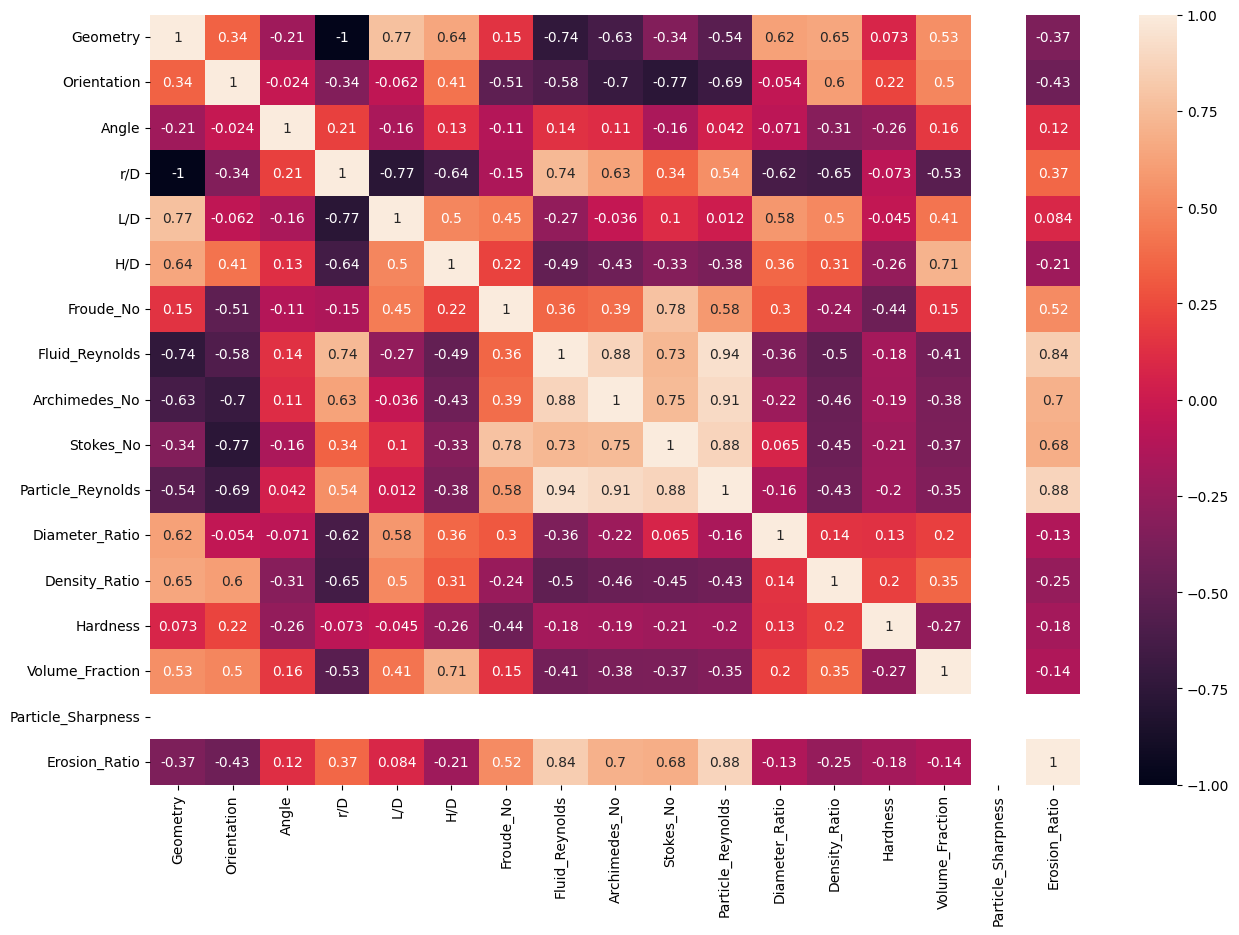

In [ ]:
### VISUALISE CORRELATION USING SEABORN HEATMAP.

a1_dims = (15, 10)
fig, ax = plt.subplots(figsize=a1_dims)
relation =inputs.corr()
relation_index=relation.index
relation_index
sns.heatmap(inputs[relation_index].corr(),annot=True)
plt.tight_layout

# FEATURE SELECTION & SPLITTING DATA

In [ ]:
### IMPORTING ADDITIONAL LIBRARIES

from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import preprocessing

In [ ]:
### GROUPING DATA INTO INPUT AND OUTPUT VARIABLES

X = inputs.drop('Erosion_Ratio',axis='columns')
y = inputs['Erosion_Ratio']

In [ ]:
# SPLIT DATASET INTO TRAINING AND TESTING SET: ### CHANGE TEST_SIZE AS REQUIRED' RANDOM_STATE-  CHANGE AS REQUIRED, BUT KEEP CONSTATNT ACROSS ALL MODEL TRAINING/RETRAINING FOR THE SAME DATA SPLIT TO RENSURE REPRODUCIBILITY

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 5)

In [ ]:
# X_train.head()

In [ ]:
# X_train.describe()

In [ ]:
df_newTr = pd.DataFrame(y_train)
df_newTr['-20%'] = pd.DataFrame(y_train)*0.8
df_newTr['+20%'] = pd.DataFrame(y_train)*1.2
# df_newTr.head()

In [ ]:
y_trainTr = list(df_newTr.iloc[:, 0])
y_minus20p_Tr = list(df_newTr.iloc[:, 1])
y_plus20p_Tr = list(df_newTr.iloc[:, 2])

In [ ]:
df_newTe = pd.DataFrame(y_test)
df_newTe['-20%'] = pd.DataFrame(y_test)*0.8
df_newTe['+20%'] = pd.DataFrame(y_test)*1.2
# df_newTe.head()

In [ ]:
y_testTe = list(df_newTr.iloc[:, 0])
y_minus20p_Te = list(df_newTe.iloc[:, 1])
y_plus20p_Te = list(df_newTe.iloc[:, 2])

# DECISION TREE REGRESSION

## DECISION TREE REGRESSION - NO PARAMETER TUNNING

In [ ]:
#Importing Decisoion Tree Regression Model
from sklearn.tree import DecisionTreeRegressor
dtreg=DecisionTreeRegressor(random_state=5)

In [ ]:
# fit independent varaibles to the dependent variables
LL_dt = dtreg.fit(X_train, y_train)

In [ ]:
#Prediction on the training dataset
ytrain_pred_dtreg =LL_dt.predict(X_train)

In [ ]:
#Prediction on the testing dataset
ytest_pred_dtreg = LL_dt.predict(X_test)

In [ ]:
#Evaluate model performance
#training dataset
dt_train_r2 = r2_score(y_train, ytrain_pred_dtreg)
dt_train_mse = mean_squared_error(y_train, ytrain_pred_dtreg)
dt_train_mae = mean_absolute_error(y_train, ytrain_pred_dtreg)
dt_train_rmse = np.sqrt(mean_squared_error(y_train, ytrain_pred_dtreg))
dt_train_evs = explained_variance_score(y_train, ytrain_pred_dtreg)

#testinf dataset
dt_test_r2 = r2_score(y_test, ytest_pred_dtreg)
dt_test_mse = mean_squared_error(y_test, ytest_pred_dtreg)
dt_test_mae = mean_absolute_error(y_test, ytest_pred_dtreg)
dt_test_rmse = np.sqrt(mean_squared_error(y_test, ytest_pred_dtreg))
dt_test_evs = explained_variance_score(y_test, ytest_pred_dtreg)

In [ ]:
dt_result = pd.DataFrame(['Decision Tree', dt_train_r2, dt_train_mae, dt_train_mse, dt_train_rmse, dt_train_evs,  dt_test_r2, dt_test_mae, dt_test_mse, dt_test_rmse, dt_test_evs]).transpose()
dt_result.columns = ['Method', 'Training R2','Training MAE', 'Training MSE', 'Training RMSE','Training EVS','Testing R2','Testing MAE', 'Testing MSE', 'Testing RMSE','Testing EVS' ]
dt_result

,Method,Training R2,Training MAE,Training MSE,Training RMSE,Training EVS,Testing R2,Testing MAE,Testing MSE,Testing RMSE,Testing EVS
0,Decision Tree,0.999414,0.000574,0.000001,0.001051,0.999414,0.957533,0.00335,0.00007,0.008356,0.957558


<Axes: >

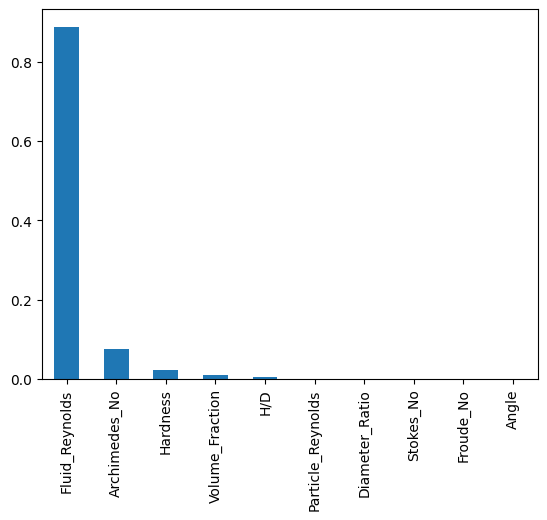

In [ ]:
#Ranking of parameter
f_list = list(X.columns)
f_importance_dtreg = pd.Series(LL_dt.feature_importances_, index = f_list).sort_values(ascending = False)
f_importance_dtreg
f_importance_dtreg.head(10).plot(kind='bar')

## DECISION TREE REGRESSION - WITH PARAMETER TUNING

In [ ]:
# GRIDSEARCH
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

param_grid_dtreg = {
                    'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                    'min_samples_split': [2, 5, 10],
                    'min_samples_leaf': [1, 2, 4, 5],
                    'max_features': ['sqrt', 'log2', 0.5, 0.75, 1.0]
                   }

# Create a Decision Tree Regressor
regressor_dtreg = DecisionTreeRegressor(random_state=5)

# Set up Grid Search with cross-validation
grid_search_dtreg = GridSearchCV(estimator=regressor_dtreg, param_grid=param_grid_dtreg,
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the model
grid_search_dtreg.fit(X_train, y_train)

# Get the best parameters
best_params_Grid_dtreg = grid_search_dtreg.best_params_
print(f'Best Parameters: {best_params_Grid_dtreg}')

# Create a regressor with the best parameters
best_regressor_Grid_dtreg = DecisionTreeRegressor(**best_params_Grid_dtreg, random_state=5)
best_regressor_Grid_dtreg.fit(X_train, y_train)

# Make predictions on the train set
ytrain_pred_hyper_Grid_dtreg = best_regressor_Grid_dtreg.predict(X_train)

# Make predictions on the test set
ytest_pred_hyper_Grid_dtreg = best_regressor_Grid_dtreg.predict(X_test)

Best Parameters: {'max_depth': 7, 'max_features': 0.75, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
#Evaluate model performance
#training dataset
hypdtGrid_train_r2 = r2_score(y_train, ytrain_pred_hyper_Grid_dtreg)
hypdtGrid_train_mse = mean_squared_error(y_train, ytrain_pred_hyper_Grid_dtreg)
hypdtGrid_train_mae = mean_absolute_error(y_train, ytrain_pred_hyper_Grid_dtreg)
hypdtGrid_train_rmse = np.sqrt(mean_squared_error(y_train, ytrain_pred_hyper_Grid_dtreg))
hypdtGrid_train_evs = explained_variance_score(y_train, ytrain_pred_hyper_Grid_dtreg)

#testinf dataset
hypdtGrid_test_r2 = r2_score(y_test, ytest_pred_hyper_Grid_dtreg)
hypdtGrid_test_mse = mean_squared_error(y_test, ytest_pred_hyper_Grid_dtreg)
hypdtGrid_test_mae = mean_absolute_error(y_test, ytest_pred_hyper_Grid_dtreg)
hypdtGrid_test_rmse = np.sqrt(mean_squared_error(y_test, ytest_pred_hyper_Grid_dtreg))
hypdtGrid_test_evs = explained_variance_score(y_test, ytest_pred_hyper_Grid_dtreg)

In [ ]:
hypdtGrid_result = pd.DataFrame(['Decision Tree', hypdtGrid_train_r2, hypdtGrid_train_mae, hypdtGrid_train_mse, hypdtGrid_train_rmse, hypdtGrid_train_evs, hypdtGrid_test_r2, hypdtGrid_test_mae, hypdtGrid_test_mse, hypdtGrid_test_rmse, hypdtGrid_test_evs]).transpose()
hypdtGrid_result.columns = ['Method', 'Training R2','Training MAE', 'Training MSE', 'Training RMSE','Training EVS','Testing R2','Testing MAE', 'Testing MSE', 'Testing RMSE','Testing EVS' ]
hypdtGrid_result

,Method,Training R2,Training MAE,Training MSE,Training RMSE,Training EVS,Testing R2,Testing MAE,Testing MSE,Testing RMSE,Testing EVS
0,Decision Tree,0.999277,0.000735,0.000001,0.001167,0.999277,0.963253,0.003039,0.00006,0.007773,0.963603


In [ ]:
# RANDOMISED SEARCH
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from scipy.stats import randint

param_dist_dtreg = {
                    'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                    'min_samples_split': [2, 5, 10],
                    'min_samples_leaf': [1, 2, 4, 5],
                    'max_features': ['sqrt', 'log2', 0.5, 0.75, 1.0]
}

# Create a Decision Tree Regressor
regressor_dtreg = DecisionTreeRegressor(random_state=5)

# Set up Randomized Search with cross-validation
random_search_dtreg = RandomizedSearchCV(estimator=regressor_dtreg, param_distributions=param_dist_dtreg,
                                   n_iter=100, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, random_state=5)

# Fit the model
random_search_dtreg.fit(X_train, y_train)

# Get the best parameters
best_params_Rand_dtreg = random_search_dtreg.best_params_
print(f'Best Parameters: {best_params_Rand_dtreg}')

# Create a regressor with the best parameters
best_regressor_Rand_dtreg = DecisionTreeRegressor(**best_params_Rand_dtreg, random_state=5)
best_regressor_Rand_dtreg.fit(X_train, y_train)

# Make predictions on the train set
ytrain_pred_hyper_Rand_dtreg = best_regressor_Rand_dtreg.predict(X_train)

# Make predictions on the test set
ytest_pred_hyper_Rand_dtreg = best_regressor_Rand_dtreg.predict(X_test)

Best Parameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 8}


In [ ]:
hypdtRand_train_r2 = r2_score(y_train, ytrain_pred_hyper_Rand_dtreg)
hypdtRand_train_mse = mean_squared_error(y_train, ytrain_pred_hyper_Rand_dtreg)
hypdtRand_train_mae = mean_absolute_error(y_train, ytrain_pred_hyper_Rand_dtreg)
hypdtRand_train_rmse = np.sqrt(mean_squared_error(y_train, ytrain_pred_hyper_Rand_dtreg))
hypdtRand_train_evs = explained_variance_score(y_train, ytrain_pred_hyper_Rand_dtreg)

#testinf dataset
hypdtRand_test_r2 = r2_score(y_test, ytest_pred_hyper_Rand_dtreg)
hypdtRand_test_mse = mean_squared_error(y_test, ytest_pred_hyper_Rand_dtreg)
hypdtRand_test_mae = mean_absolute_error(y_test, ytest_pred_hyper_Rand_dtreg)
hypdtRand_test_rmse = np.sqrt(mean_squared_error(y_test, ytest_pred_hyper_Rand_dtreg))
hypdtRand_test_evs = explained_variance_score(y_test, ytest_pred_hyper_Rand_dtreg)

In [ ]:
hypdtRand_result = pd.DataFrame(['Decision Tree', hypdtRand_train_r2, hypdtRand_train_mae, hypdtRand_train_mse, hypdtRand_train_rmse, hypdtRand_train_evs, hypdtRand_test_r2, hypdtRand_test_mae, hypdtRand_test_mse, hypdtRand_test_rmse, hypdtRand_test_evs]).transpose()
hypdtRand_result.columns = ['Method', 'Training R2','Training MAE', 'Training MSE', 'Training RMSE','Training EVS','Testing R2','Testing MAE', 'Testing MSE', 'Testing RMSE','Testing EVS' ]
hypdtRand_result

,Method,Training R2,Training MAE,Training MSE,Training RMSE,Training EVS,Testing R2,Testing MAE,Testing MSE,Testing RMSE,Testing EVS
0,Decision Tree,0.999401,0.000626,0.000001,0.001062,0.999401,0.967443,0.002747,0.000054,0.007316,0.967644


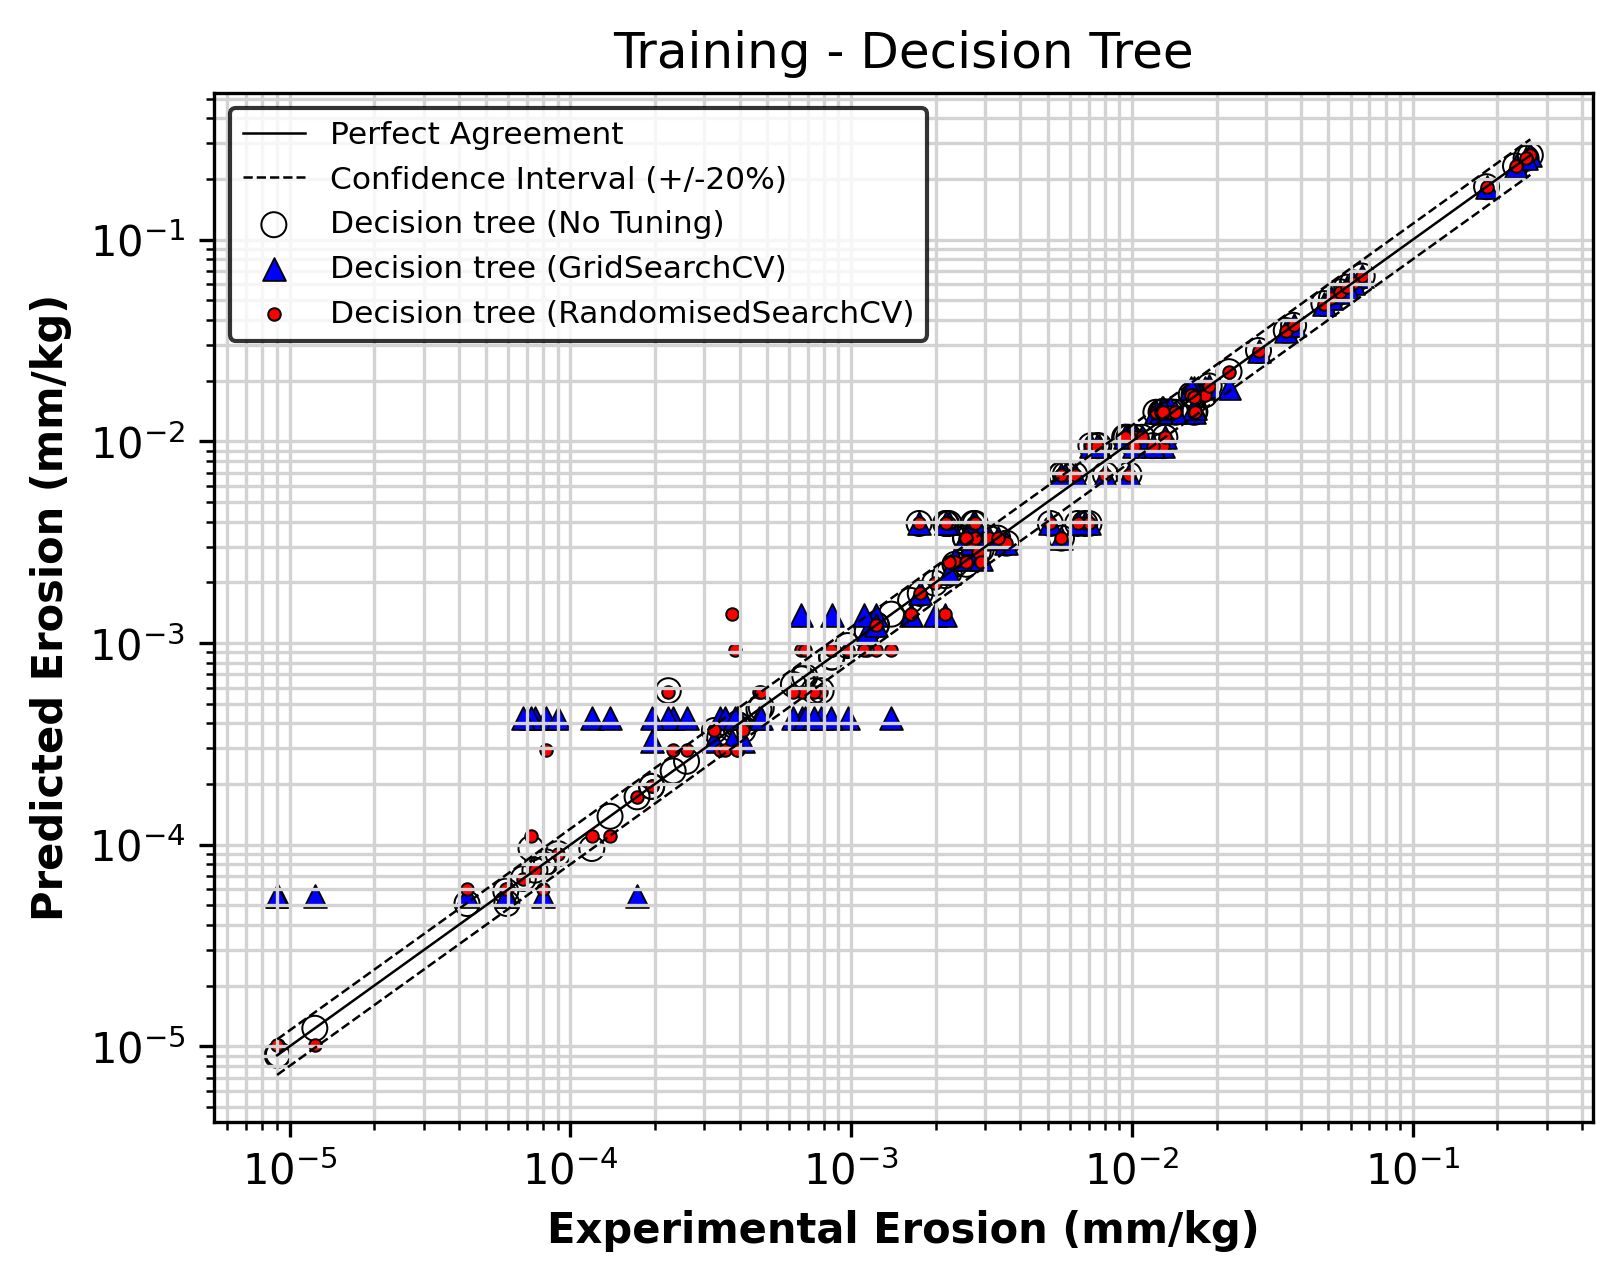

In [ ]:
# plotting the observed and predicted
fig = plt.figure(figsize=(15,20), dpi=300)

plt.subplot(5,3,1)
sns.lineplot(x=y_train, y=y_train, linestyle='-', linewidth=0.6, label = 'Perfect Agreement', color ='k').set(xscale='log', yscale='log')
sns.lineplot(x=y_train, y=y_minus20p_Tr, color ='k', linestyle = 'dashed', dashes=(1,15), linewidth=0.6, label = 'Confidence Interval (+/-20%)').set(xscale='log', yscale='log')
sns.lineplot(x=y_train, y=y_plus20p_Tr, color ='k', linestyle = 'dashed', dashes=(1,15), linewidth=0.6).set(xscale='log', yscale='log')
sns.scatterplot(x=y_train, y=ytrain_pred_dtreg, marker='o', facecolors='none', edgecolors='k', label = 'Decision tree (No Tuning)').set(xscale='log', yscale='log')
sns.scatterplot(x=y_train, y=ytrain_pred_hyper_Grid_dtreg, marker='^', facecolors='b', edgecolors='k', s=30, label = 'Decision tree (GridSearchCV)').set(xscale='log', yscale='log')
sns.scatterplot(x=y_train, y=ytrain_pred_hyper_Rand_dtreg, marker='.', facecolors='r', edgecolors='k', label = 'Decision tree (RandomisedSearchCV)').set(xscale='log', yscale='log')
plt.title('Training - Decision Tree')
plt.ylabel('Predicted Erosion (mm/kg)', weight='bold')
plt.xlabel('Experimental Erosion (mm/kg)', weight='bold')
plt.legend(frameon=True, facecolor='white', edgecolor='k', fontsize=7.5)
plt.grid(True, which="both", ls="-",c='#D3D3D3')
plt.tight_layout()
plt.show()


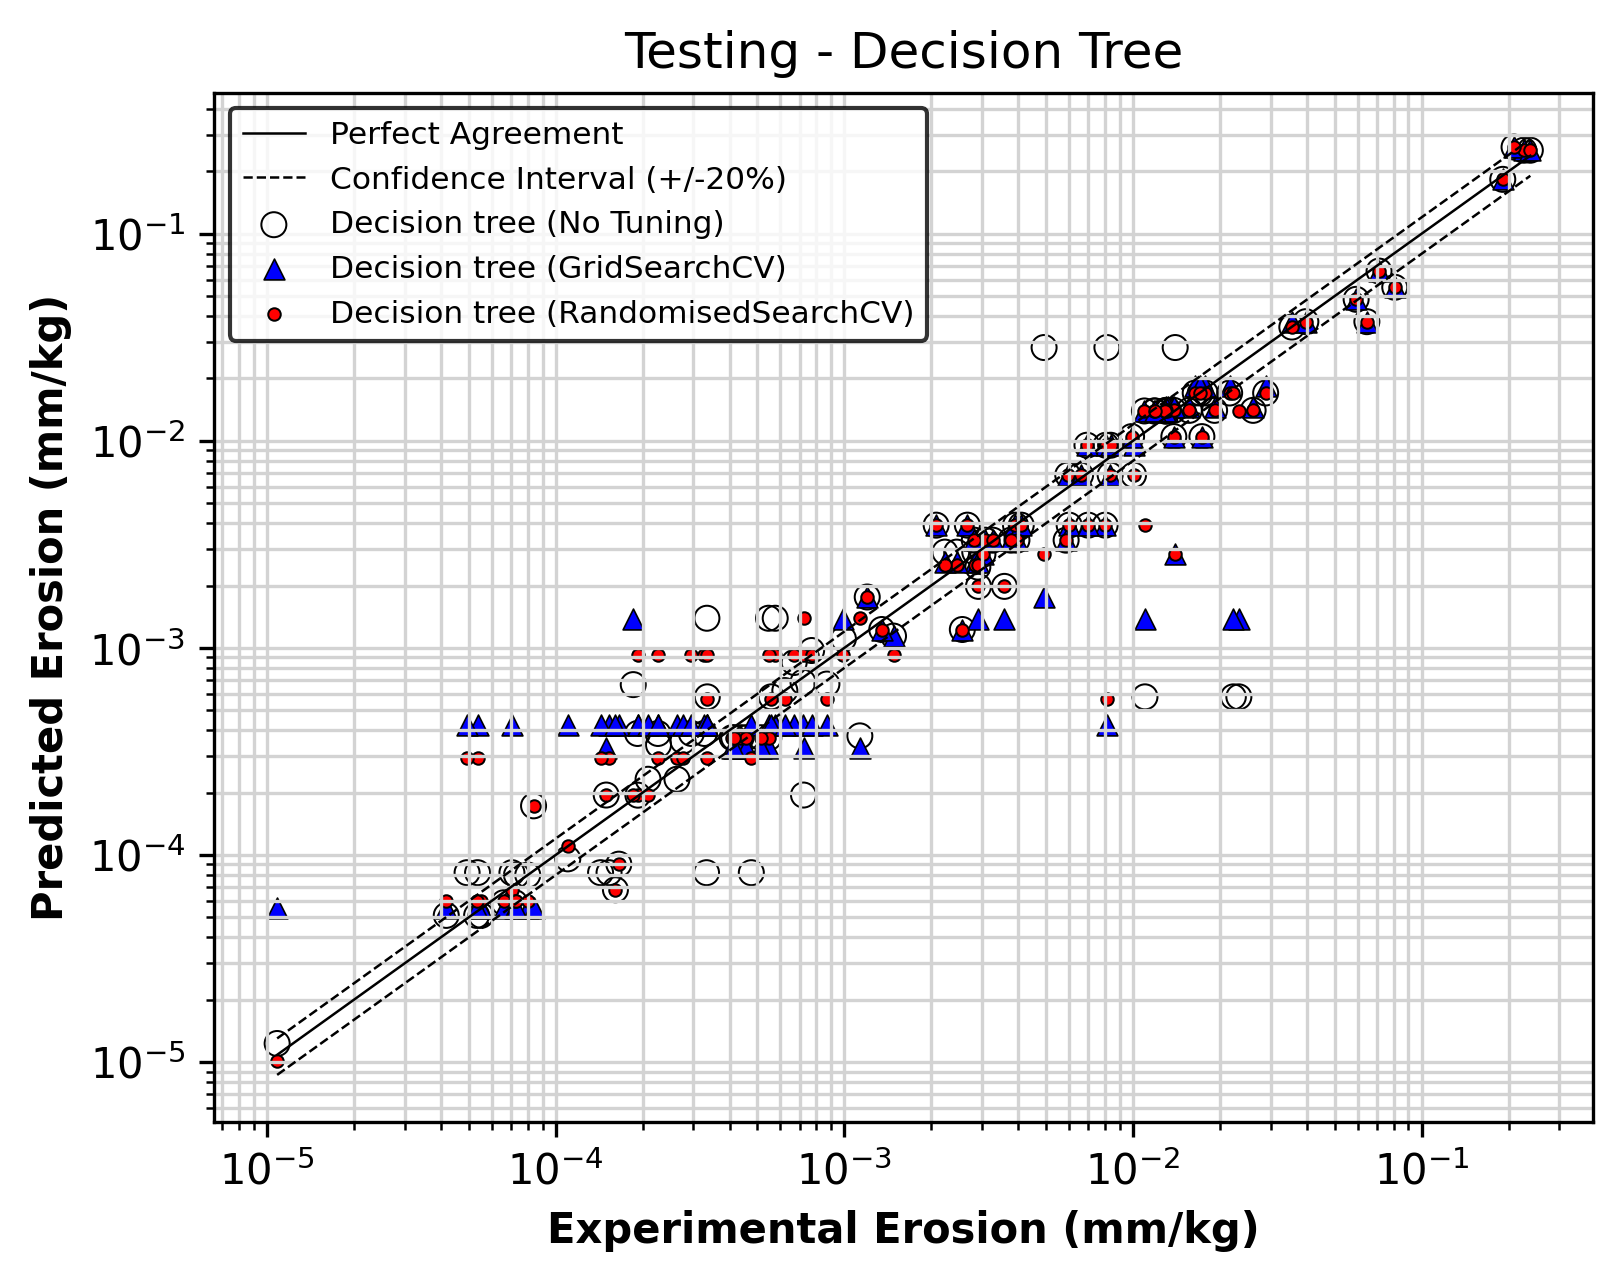

In [ ]:
# plotting the observed and predicted
fig = plt.figure(figsize=(15,20), dpi=300)

plt.subplot(5,3,1)
sns.lineplot(x=y_test, y=y_test, linestyle='-', linewidth=0.6, label = 'Perfect Agreement', color ='k').set(xscale='log', yscale='log')
sns.lineplot(x=y_test, y=y_minus20p_Te, color ='k', linestyle = 'dashed', dashes=(1,15), linewidth=0.6, label = 'Confidence Interval (+/-20%)').set(xscale='log', yscale='log')
sns.lineplot(x=y_test, y=y_plus20p_Te, color ='k', linestyle = 'dashed', dashes=(1,15), linewidth=0.6).set(xscale='log', yscale='log')
sns.scatterplot(x=y_test, y=ytest_pred_dtreg, marker='o', facecolors='none', edgecolors='k', label = 'Decision tree (No Tuning)').set(xscale='log', yscale='log')
sns.scatterplot(x=y_test, y=ytest_pred_hyper_Grid_dtreg, marker='^', facecolors='b', edgecolors='k', s=25, label = 'Decision tree (GridSearchCV)').set(xscale='log', yscale='log')
sns.scatterplot(x=y_test, y=ytest_pred_hyper_Rand_dtreg, marker='.', facecolors='r', edgecolors='k', label = 'Decision tree (RandomisedSearchCV)').set(xscale='log', yscale='log')
plt.title('Testing - Decision Tree')
plt.ylabel('Predicted Erosion (mm/kg)', weight='bold')
plt.xlabel('Experimental Erosion (mm/kg)', weight='bold')
plt.legend(frameon=True, facecolor='white', edgecolor='k', fontsize=7.5)
plt.grid(True, which="both", ls="-",c='#D3D3D3')
plt.tight_layout()
plt.show()

# RANDOM FOREST REGRESSION

## RANDOM FOREST REGRESSION - NO PARAMETER TUNNING

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfreg = RandomForestRegressor(random_state=5)

In [ ]:
LL_rf = rfreg.fit(X_train, y_train)

In [ ]:
#Prediction on the training dataset
ytrain_pred_rfreg = LL_rf.predict(X_train)

In [ ]:
#Prediction on the testing dataset
ytest_pred_rfreg = LL_rf.predict(X_test)

In [ ]:
#Evaluate model performance
#training dataset
rf_train_r2 = r2_score(y_train, ytrain_pred_rfreg)
rf_train_mse = mean_squared_error(y_train, ytrain_pred_rfreg)
rf_train_mae = mean_absolute_error(y_train, ytrain_pred_rfreg)
rf_train_rmse = np.sqrt(mean_squared_error(y_train, ytrain_pred_rfreg))
rf_train_evs = explained_variance_score(y_train, ytrain_pred_rfreg)

#testinf dataset
rf_test_r2 = r2_score(y_test, ytest_pred_rfreg)
rf_test_mse = mean_squared_error(y_test, ytest_pred_rfreg)
rf_test_mae = mean_absolute_error(y_test, ytest_pred_rfreg)
rf_test_rmse = np.sqrt(mean_squared_error(y_test, ytest_pred_rfreg))
rf_test_evs = explained_variance_score(y_test, ytest_pred_rfreg)

In [ ]:
rf_result = pd.DataFrame(['Random Forest', rf_train_r2, rf_train_mae, rf_train_mse, rf_train_rmse, rf_train_evs,  rf_test_r2, rf_test_mae, rf_test_mse, rf_test_rmse, rf_test_evs]).transpose()
rf_result.columns = ['Method', 'Training R2','Training MAE', 'Training MSE', 'Training RMSE','Training EVS','Testing R2','Testing MAE', 'Testing MSE', 'Testing RMSE','Testing EVS' ]
rf_result

,Method,Training R2,Training MAE,Training MSE,Training RMSE,Training EVS,Testing R2,Testing MAE,Testing MSE,Testing RMSE,Testing EVS
0,Random Forest,0.990114,0.001673,0.000019,0.004317,0.990123,0.97251,0.002926,0.000045,0.006723,0.972542


<Axes: >

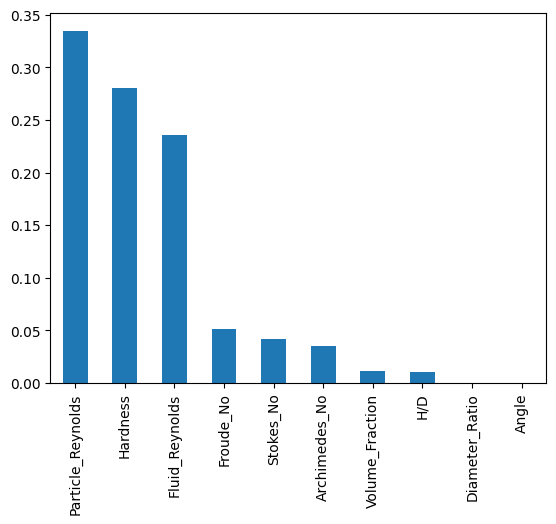

In [ ]:
#Ranking of parameter
f_list = list(X.columns)
f_importance_rfreg = pd.Series(LL_rf.feature_importances_, index = f_list).sort_values(ascending = False)
f_importance_rfreg
f_importance_rfreg.head(10).plot(kind='bar')

## RANDOM FOREST REGRESSION - WITH PARAMETER TUNNING

In [ ]:
# GRIDSEARCH

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

param_grid_rfreg = {
                    'n_estimators': [50, 100, 200, 300, 500],
                    'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                    'min_samples_split': [2, 5, 10],
                    'min_samples_leaf': [1, 2, 4, 5],
                    'max_features': ['sqrt', 'log2', 0.5, 0.75, 1.0]
                   }

# Create a Random Forest Regressor
regressor_rfreg = RandomForestRegressor(random_state=5)

# Set up Grid Search with cross-validation
grid_search_rfreg = GridSearchCV(estimator=regressor_rfreg, param_grid=param_grid_rfreg,
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the model
grid_search_rfreg.fit(X_train, y_train)

# Get the best parameters
best_params_Grid_rfreg = grid_search_rfreg.best_params_
print(f'Best Parameters: {best_params_Grid_rfreg}')

# Create a regressor with the best parameters
best_regressor_Grid_rfreg = RandomForestRegressor(**best_params_Grid_rfreg, random_state=5)
best_regressor_Grid_rfreg.fit(X_train, y_train)

# Make predictions on the test set
ytrain_pred_hyper_Grid_rfreg = best_regressor_Grid_rfreg.predict(X_train)

# Make predictions on the test set
ytest_pred_hyper_Grid_rfreg = best_regressor_Grid_rfreg.predict(X_test)

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
#Evaluate model performance
#training dataset
hyprfGrid_train_r2 = r2_score(y_train, ytrain_pred_hyper_Grid_rfreg)
hyprfGrid_train_mse = mean_squared_error(y_train, ytrain_pred_hyper_Grid_rfreg)
hyprfGrid_train_mae = mean_absolute_error(y_train, ytrain_pred_hyper_Grid_rfreg)
hyprfGrid_train_rmse = np.sqrt(mean_squared_error(y_train, ytrain_pred_hyper_Grid_rfreg))
hyprfGrid_train_evs = explained_variance_score(y_train, ytrain_pred_hyper_Grid_rfreg)

#testinf dataset
hyprfGrid_test_r2 = r2_score(y_test, ytest_pred_hyper_Grid_rfreg)
hyprfGrid_test_mse = mean_squared_error(y_test, ytest_pred_hyper_Grid_rfreg)
hyprfGrid_test_mae = mean_absolute_error(y_test, ytest_pred_hyper_Grid_rfreg)
hyprfGrid_test_rmse = np.sqrt(mean_squared_error(y_test, ytest_pred_hyper_Grid_rfreg))
hyprfGrid_test_evs = explained_variance_score(y_test, ytest_pred_hyper_Grid_rfreg)

In [ ]:
hyprfGrid_result = pd.DataFrame(['Random Forest', hyprfGrid_train_r2, hyprfGrid_train_mae, hyprfGrid_train_mse, hyprfGrid_train_rmse, hyprfGrid_train_evs, hyprfGrid_test_r2, hyprfGrid_test_mae, hyprfGrid_test_mse, hyprfGrid_test_rmse, hyprfGrid_test_evs]).transpose()
hyprfGrid_result.columns = ['Method', 'Training R2','Training MAE', 'Training MSE', 'Training RMSE','Training EVS','Testing R2','Testing MAE', 'Testing MSE', 'Testing RMSE','Testing EVS' ]
hyprfGrid_result

,Method,Training R2,Training MAE,Training MSE,Training RMSE,Training EVS,Testing R2,Testing MAE,Testing MSE,Testing RMSE,Testing EVS
0,Random Forest,0.992886,0.001558,0.000013,0.003662,0.992886,0.976218,0.00282,0.000039,0.006253,0.976223


In [ ]:
# RANDOMISED SEARCH

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from scipy.stats import randint

param_dist_rfreg = {
                    'n_estimators': [50, 100, 200, 300, 500],
                    'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                    'min_samples_split': [2, 5, 10],
                    'min_samples_leaf': [1, 2, 4, 5],
                    'max_features': ['sqrt', 'log2', 0.5, 0.75, 1.0]
                   }

# Create a Random Forest RegressorAllow Instagram content?

regressor_rfreg = RandomForestRegressor(random_state=5)

# Set up Randomized Search with cross-validation
random_search_rfreg = RandomizedSearchCV(estimator=regressor_rfreg, param_distributions=param_dist_rfreg,
                                   n_iter=100, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, random_state=5)

# Fit the model
random_search_rfreg.fit(X_train, y_train)

# Get the best parameters
best_params_Rand_rfreg = random_search_rfreg.best_params_
print(f'Best Parameters: {best_params_Rand_rfreg}')

# Create a regressor with the best parameters
best_regressor_Rand_rfreg = RandomForestRegressor(**best_params_Rand_rfreg, random_state=5)
best_regressor_Rand_rfreg.fit(X_train, y_train)

# Make predictions on the train set
ytrain_pred_hyper_Rand_rfreg = best_regressor_Rand_rfreg.predict(X_train)

# Make predictions on the test set
ytest_pred_hyper_Rand_rfreg = best_regressor_Rand_rfreg.predict(X_test)

Best Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 6}


In [ ]:
hyprfRand_train_r2 = r2_score(y_train, ytrain_pred_hyper_Rand_rfreg)
hyprfRand_train_mse = mean_squared_error(y_train, ytrain_pred_hyper_Rand_rfreg)
hyprfRand_train_mae = mean_absolute_error(y_train, ytrain_pred_hyper_Rand_rfreg)
hyprfRand_train_rmse = np.sqrt(mean_squared_error(y_train, ytrain_pred_hyper_Rand_rfreg))
hyprfRand_train_evs = explained_variance_score(y_train, ytrain_pred_hyper_Rand_rfreg)

#testinf dataset
hyprfRand_test_r2 = r2_score(y_test, ytest_pred_hyper_Rand_rfreg)
hyprfRand_test_mse = mean_squared_error(y_test, ytest_pred_hyper_Rand_rfreg)
hyprfRand_test_mae = mean_absolute_error(y_test, ytest_pred_hyper_Rand_rfreg)
hyprfRand_test_rmse = np.sqrt(mean_squared_error(y_test, ytest_pred_hyper_Rand_rfreg))
hyprfRand_test_evs = explained_variance_score(y_test, ytest_pred_hyper_Rand_rfreg)

In [ ]:
hyprfRand_result = pd.DataFrame(['Random Forest', hyprfRand_train_r2, hyprfRand_train_mae, hyprfRand_train_mse, hyprfRand_train_rmse, hyprfRand_train_evs, hyprfRand_test_r2, hyprfRand_test_mae, hyprfRand_test_mse, hyprfRand_test_rmse, hyprfRand_test_evs]).transpose()
hyprfRand_result.columns = ['Method', 'Training R2','Training MAE', 'Training MSE', 'Training RMSE','Training EVS','Testing R2','Testing MAE', 'Testing MSE', 'Testing RMSE','Testing EVS' ]
hyprfRand_result

,Method,Training R2,Training MAE,Training MSE,Training RMSE,Training EVS,Testing R2,Testing MAE,Testing MSE,Testing RMSE,Testing EVS
0,Random Forest,0.992976,0.0017,0.000013,0.003638,0.99298,0.97583,0.002895,0.00004,0.006304,0.975842


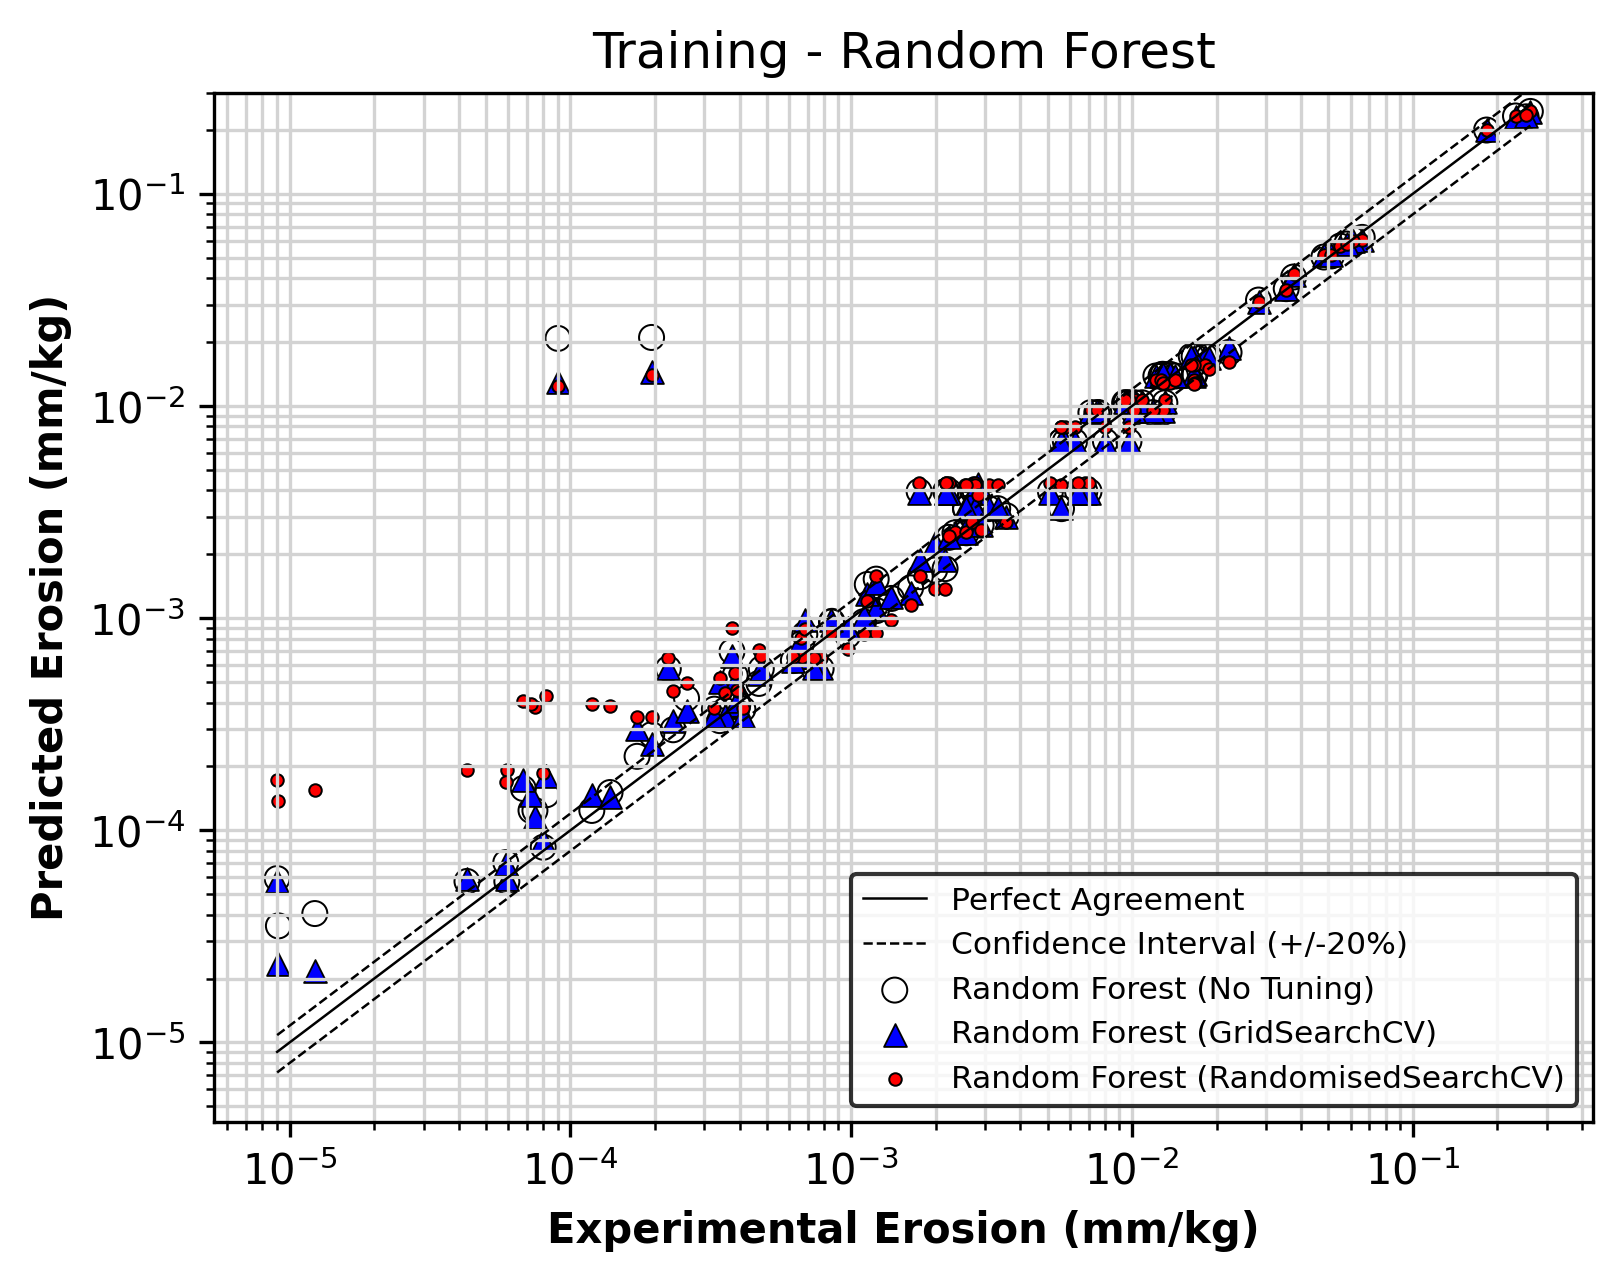

In [ ]:
# plotting the observed and predicted
fig = plt.figure(figsize=(15,20), dpi=300)

plt.subplot(5,3,1)
sns.lineplot(x=y_train, y=y_train, linestyle='-', linewidth=0.6, label = 'Perfect Agreement', color ='k').set(xscale='log', yscale='log')
sns.lineplot(x=y_train, y=y_minus20p_Tr, color ='k', linestyle = 'dashed', dashes=(1,15), linewidth=0.6, label = 'Confidence Interval (+/-20%)').set(xscale='log', yscale='log')
sns.lineplot(x=y_train, y=y_plus20p_Tr, color ='k', linestyle = 'dashed', dashes=(1,15), linewidth=0.6).set(xscale='log', yscale='log')
sns.scatterplot(x=y_train, y=ytrain_pred_rfreg, marker='o', facecolors='none', edgecolors='k', label = 'Random Forest (No Tuning)').set(xscale='log', yscale='log')
sns.scatterplot(x=y_train, y=ytrain_pred_hyper_Grid_rfreg, marker='^', facecolors='b', edgecolors='k', s=30, label = 'Random Forest (GridSearchCV)').set(xscale='log', yscale='log')
sns.scatterplot(x=y_train, y=ytrain_pred_hyper_Rand_rfreg, marker='.', facecolors='r', edgecolors='k', label = 'Random Forest (RandomisedSearchCV)').set(xscale='log', yscale='log')
plt.title('Training - Random Forest')
plt.ylabel('Predicted Erosion (mm/kg)', weight='bold')
plt.xlabel('Experimental Erosion (mm/kg)', weight='bold')
plt.ylim(top=0.3)
# plt.xlim(0, 1.6e-3)
plt.legend(frameon=True, facecolor='white', edgecolor='k', fontsize=7.5)
plt.grid(True, which="both", ls="-",c='#D3D3D3')
plt.tight_layout()
plt.show()

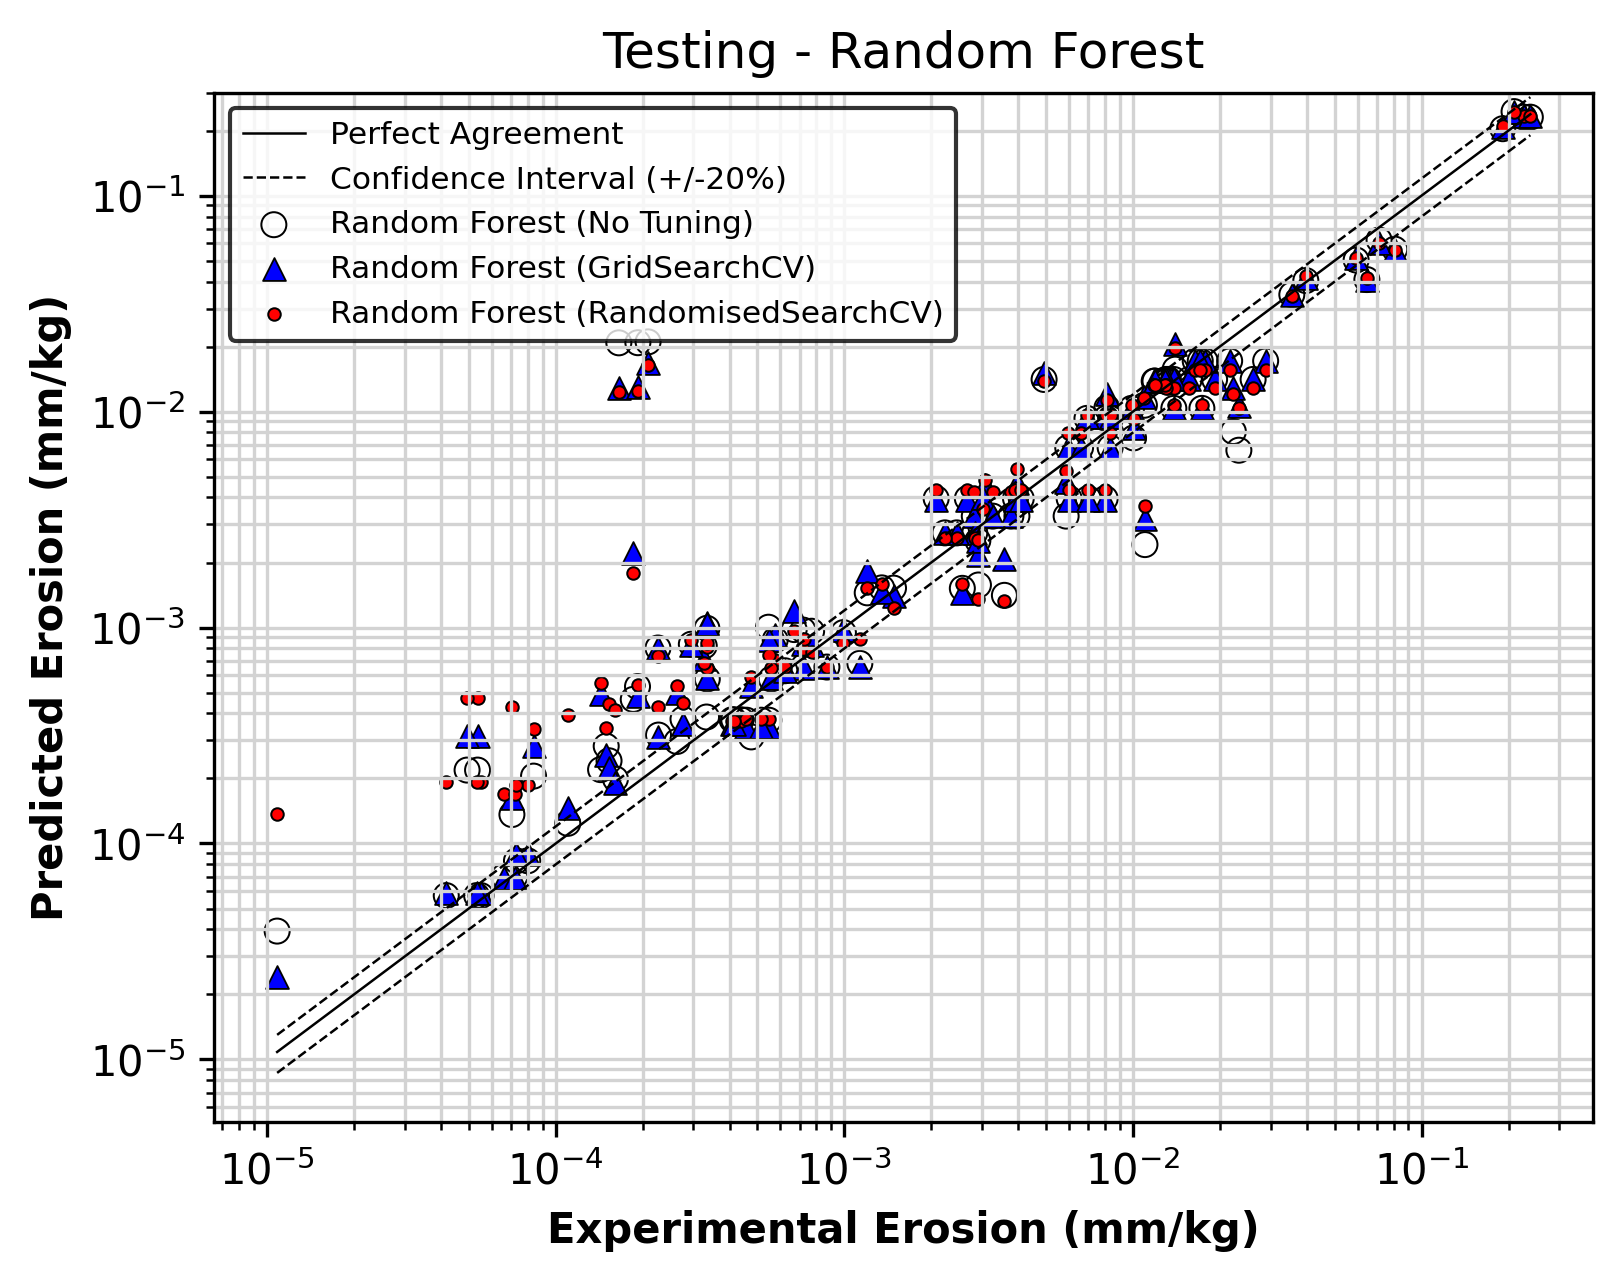

In [ ]:
# plotting the observed and predicted
fig = plt.figure(figsize=(15,20), dpi=300)

plt.subplot(5,3,1)
sns.lineplot(x=y_test, y=y_test, linestyle='-', linewidth=0.6, label = 'Perfect Agreement', color ='k').set(xscale='log', yscale='log')
sns.lineplot(x=y_test, y=y_minus20p_Te, color ='k', linestyle = 'dashed', dashes=(1,15), linewidth=0.6, label = 'Confidence Interval (+/-20%)').set(xscale='log', yscale='log')
sns.lineplot(x=y_test, y=y_plus20p_Te, color ='k', linestyle = 'dashed', dashes=(1,15), linewidth=0.6).set(xscale='log', yscale='log')
sns.scatterplot(x=y_test, y=ytest_pred_rfreg, marker='o', facecolors='none', edgecolors='k', label = 'Random Forest (No Tuning)').set(xscale='log', yscale='log')
sns.scatterplot(x=y_test, y=ytest_pred_hyper_Grid_rfreg, marker='^', facecolors='b', edgecolors='k', s=30, label = 'Random Forest (GridSearchCV)').set(xscale='log', yscale='log')
sns.scatterplot(x=y_test, y=ytest_pred_hyper_Rand_rfreg, marker='.', facecolors='r', edgecolors='k', label = 'Random Forest (RandomisedSearchCV)').set(xscale='log', yscale='log')
plt.title('Testing - Random Forest')
plt.ylabel('Predicted Erosion (mm/kg)', weight='bold')
plt.xlabel('Experimental Erosion (mm/kg)', weight='bold')
plt.ylim(top=0.3)
# plt.xlim(0, 1.6e-3)
plt.legend(frameon=True, facecolor='white', edgecolor='k', fontsize=7.5)
plt.grid(True, which="both", ls="-",c='#D3D3D3')
plt.tight_layout()
plt.show()

# K-NEAREST NEIGHBOR REGRESSION

##  K-NEAREST NEIGHBOR REGRESSION - NO PARAMETER TUNNING

In [ ]:
#Importing KNN Regression Model
from sklearn.neighbors import KNeighborsRegressor
knnreg=KNeighborsRegressor()

In [ ]:
LL_knn = knnreg.fit(X_train, y_train)

In [ ]:
#Prediction on the training dataset
ytrain_pred_knnreg = LL_knn.predict(X_train)

In [ ]:
#Prediction on the testing dataset
ytest_pred_knnreg = LL_knn.predict(X_test)

In [ ]:
#Evaluate model peknnormance
#training dataset
knn_train_r2 = r2_score(y_train, ytrain_pred_knnreg)
knn_train_mse = mean_squared_error(y_train, ytrain_pred_knnreg)
knn_train_mae = mean_absolute_error(y_train, ytrain_pred_knnreg)
knn_train_rmse = np.sqrt(mean_squared_error(y_train, ytrain_pred_knnreg))
knn_train_evs = explained_variance_score(y_train, ytrain_pred_knnreg)

#testinf dataset
knn_test_r2 = r2_score(y_test, ytest_pred_knnreg)
knn_test_mse = mean_squared_error(y_test, ytest_pred_knnreg)
knn_test_mae = mean_absolute_error(y_test, ytest_pred_knnreg)
knn_test_rmse = np.sqrt(mean_squared_error(y_test, ytest_pred_knnreg))
knn_test_evs = explained_variance_score(y_test, ytest_pred_knnreg)

In [ ]:
knn_result = pd.DataFrame(['KNN', knn_train_r2, knn_train_mae, knn_train_mse, knn_train_rmse, knn_train_evs,  knn_test_r2, knn_test_mae, knn_test_mse, knn_test_rmse, knn_test_evs]).transpose()
knn_result.columns = ['Method', 'Training R2','Training MAE', 'Training MSE', 'Training RMSE','Training EVS','Testing R2','Testing MAE', 'Testing MSE', 'Testing RMSE','Testing EVS' ]
knn_result

,Method,Training R2,Training MAE,Training MSE,Training RMSE,Training EVS,Testing R2,Testing MAE,Testing MSE,Testing RMSE,Testing EVS
0,KNN,0.956624,0.002852,0.000082,0.009041,0.957068,0.97423,0.002785,0.000042,0.006509,0.975308


##  K-NEAREST NEIGHBOR REGRESSION - WITH PARAMETER TUNNING

In [ ]:
# GRIDSEARCH
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

param_grid_knn = {
                  'n_neighbors': [1, 3, 5, 7, 9],
                  'metric': ['euclidean', 'manhattan', 'chebyshev'],
                  'weights': ['uniform', 'distance']
                 }

# Create a KNN Regressor
regressor_knnreg = KNeighborsRegressor()

# Set up Grid Search with cross-validation
grid_search_knnreg = GridSearchCV(estimator=regressor_knnreg, param_grid=param_grid_knn,
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the model
grid_search_knnreg.fit(X_train, y_train)

# Get the best parameters
best_params_Grid_knnreg = grid_search_knnreg.best_params_
print(f'Best Parameters: {best_params_Grid_knnreg}')

# Create a regressor with the best parameters
best_regressor_Grid_knnreg = KNeighborsRegressor(**best_params_Grid_knnreg)
best_regressor_Grid_knnreg.fit(X_train, y_train)

# Make predictions on the train set
ytrain_pred_hyper_Grid_knnreg = best_regressor_Grid_knnreg.predict(X_train)

# Make predictions on the test set
ytest_pred_hyper_Grid_knnreg = best_regressor_Grid_knnreg.predict(X_test)

Best Parameters: {'metric': 'chebyshev', 'n_neighbors': 3, 'weights': 'distance'}


In [ ]:
#Evaluate model performance
#training dataset
hypknnGrid_train_r2 = r2_score(y_train, ytrain_pred_hyper_Grid_knnreg)
hypknnGrid_train_mse = mean_squared_error(y_train, ytrain_pred_hyper_Grid_knnreg)
hypknnGrid_train_mae = mean_absolute_error(y_train, ytrain_pred_hyper_Grid_knnreg)
hypknnGrid_train_rmse = np.sqrt(mean_squared_error(y_train, ytrain_pred_hyper_Grid_knnreg))
hypknnGrid_train_evs = explained_variance_score(y_train, ytrain_pred_hyper_Grid_knnreg)

#testinf dataset
hypknnGrid_test_r2 = r2_score(y_test, ytest_pred_hyper_Grid_knnreg)
hypknnGrid_test_mse = mean_squared_error(y_test, ytest_pred_hyper_Grid_knnreg)
hypknnGrid_test_mae = mean_absolute_error(y_test, ytest_pred_hyper_Grid_knnreg)
hypknnGrid_test_rmse = np.sqrt(mean_squared_error(y_test, ytest_pred_hyper_Grid_knnreg))
hypknnGrid_test_evs = explained_variance_score(y_test, ytest_pred_hyper_Grid_knnreg)

In [ ]:
hypknnGrid_result = pd.DataFrame(['KNN', hypknnGrid_train_r2, hypknnGrid_train_mae, hypknnGrid_train_mse, hypknnGrid_train_rmse, hypknnGrid_train_evs, hypknnGrid_test_r2, hypknnGrid_test_mae, hypknnGrid_test_mse, hypknnGrid_test_rmse, hypknnGrid_test_evs]).transpose()
hypknnGrid_result.columns = ['Method', 'Training R2','Training MAE', 'Training MSE', 'Training RMSE','Training EVS','Testing R2','Testing MAE', 'Testing MSE', 'Testing RMSE','Testing EVS' ]
hypknnGrid_result

,Method,Training R2,Training MAE,Training MSE,Training RMSE,Training EVS,Testing R2,Testing MAE,Testing MSE,Testing RMSE,Testing EVS
0,KNN,0.999346,0.000587,0.000001,0.001111,0.999347,0.971775,0.002805,0.000046,0.006812,0.971845


In [ ]:
# RANDOMISED SEARCH
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from scipy.stats import randint

param_dist_knn = {
                  'n_neighbors': [1, 3, 5, 7, 9],
                  'metric': ['euclidean', 'manhattan', 'chebyshev'],
                  'weights': ['uniform', 'distance']
                 }

# Create a Random Forest Regressor
regressor_knnreg = KNeighborsRegressor()

# Set up Randomized Search with cross-validation
random_search_knnreg = RandomizedSearchCV(estimator=regressor_knnreg, param_distributions=param_dist_knn,
                                   n_iter=100, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, random_state=5)

# Fit the model
random_search_knnreg.fit(X_train, y_train)

# Get the best parameters
best_params_Rand_knnreg = random_search_knnreg.best_params_
print(f'Best Parameters: {best_params_Rand_knnreg}')

# Create a regressor with the best parameters
best_regressor_Rand_knnreg = KNeighborsRegressor(**best_params_Rand_knnreg)
best_regressor_Rand_knnreg.fit(X_train, y_train)

# Make predictions on the train set
ytrain_pred_hyper_Rand_knnreg = best_regressor_Rand_knnreg.predict(X_train)

# Make predictions on the test set
ytest_pred_hyper_Rand_knnreg = best_regressor_Rand_knnreg.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 30 is smaller than n_iter=100. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters: {'weights': 'distance', 'n_neighbors': 3, 'metric': 'chebyshev'}


In [ ]:
hypknnRand_train_r2 = r2_score(y_train, ytrain_pred_hyper_Rand_knnreg)
hypknnRand_train_mse = mean_squared_error(y_train, ytrain_pred_hyper_Rand_knnreg)
hypknnRand_train_mae = mean_absolute_error(y_train, ytrain_pred_hyper_Rand_knnreg)
hypknnRand_train_rmse = np.sqrt(mean_squared_error(y_train, ytrain_pred_hyper_Rand_knnreg))
hypknnRand_train_evs = explained_variance_score(y_train, ytrain_pred_hyper_Rand_knnreg)

#testinf dataset
hypknnRand_test_r2 = r2_score(y_test, ytest_pred_hyper_Rand_knnreg)
hypknnRand_test_mse = mean_squared_error(y_test, ytest_pred_hyper_Rand_knnreg)
hypknnRand_test_mae = mean_absolute_error(y_test, ytest_pred_hyper_Rand_knnreg)
hypknnRand_test_rmse = np.sqrt(mean_squared_error(y_test, ytest_pred_hyper_Rand_knnreg))
hypknnRand_test_evs = explained_variance_score(y_test, ytest_pred_hyper_Rand_knnreg)

In [ ]:
hypknnRand_result = pd.DataFrame(['KNN', hypknnRand_train_r2, hypknnRand_train_mae, hypknnRand_train_mse, hypknnRand_train_rmse, hypknnRand_train_evs, hypknnRand_test_r2, hypknnRand_test_mae, hypknnRand_test_mse, hypknnRand_test_rmse, hypknnRand_test_evs]).transpose()
hypknnRand_result.columns = ['Method', 'Training R2','Training MAE', 'Training MSE', 'Training RMSE','Training EVS','Testing R2','Testing MAE', 'Testing MSE', 'Testing RMSE','Testing EVS' ]
hypknnRand_result

,Method,Training R2,Training MAE,Training MSE,Training RMSE,Training EVS,Testing R2,Testing MAE,Testing MSE,Testing RMSE,Testing EVS
0,KNN,0.999346,0.000587,0.000001,0.001111,0.999347,0.971775,0.002805,0.000046,0.006812,0.971845


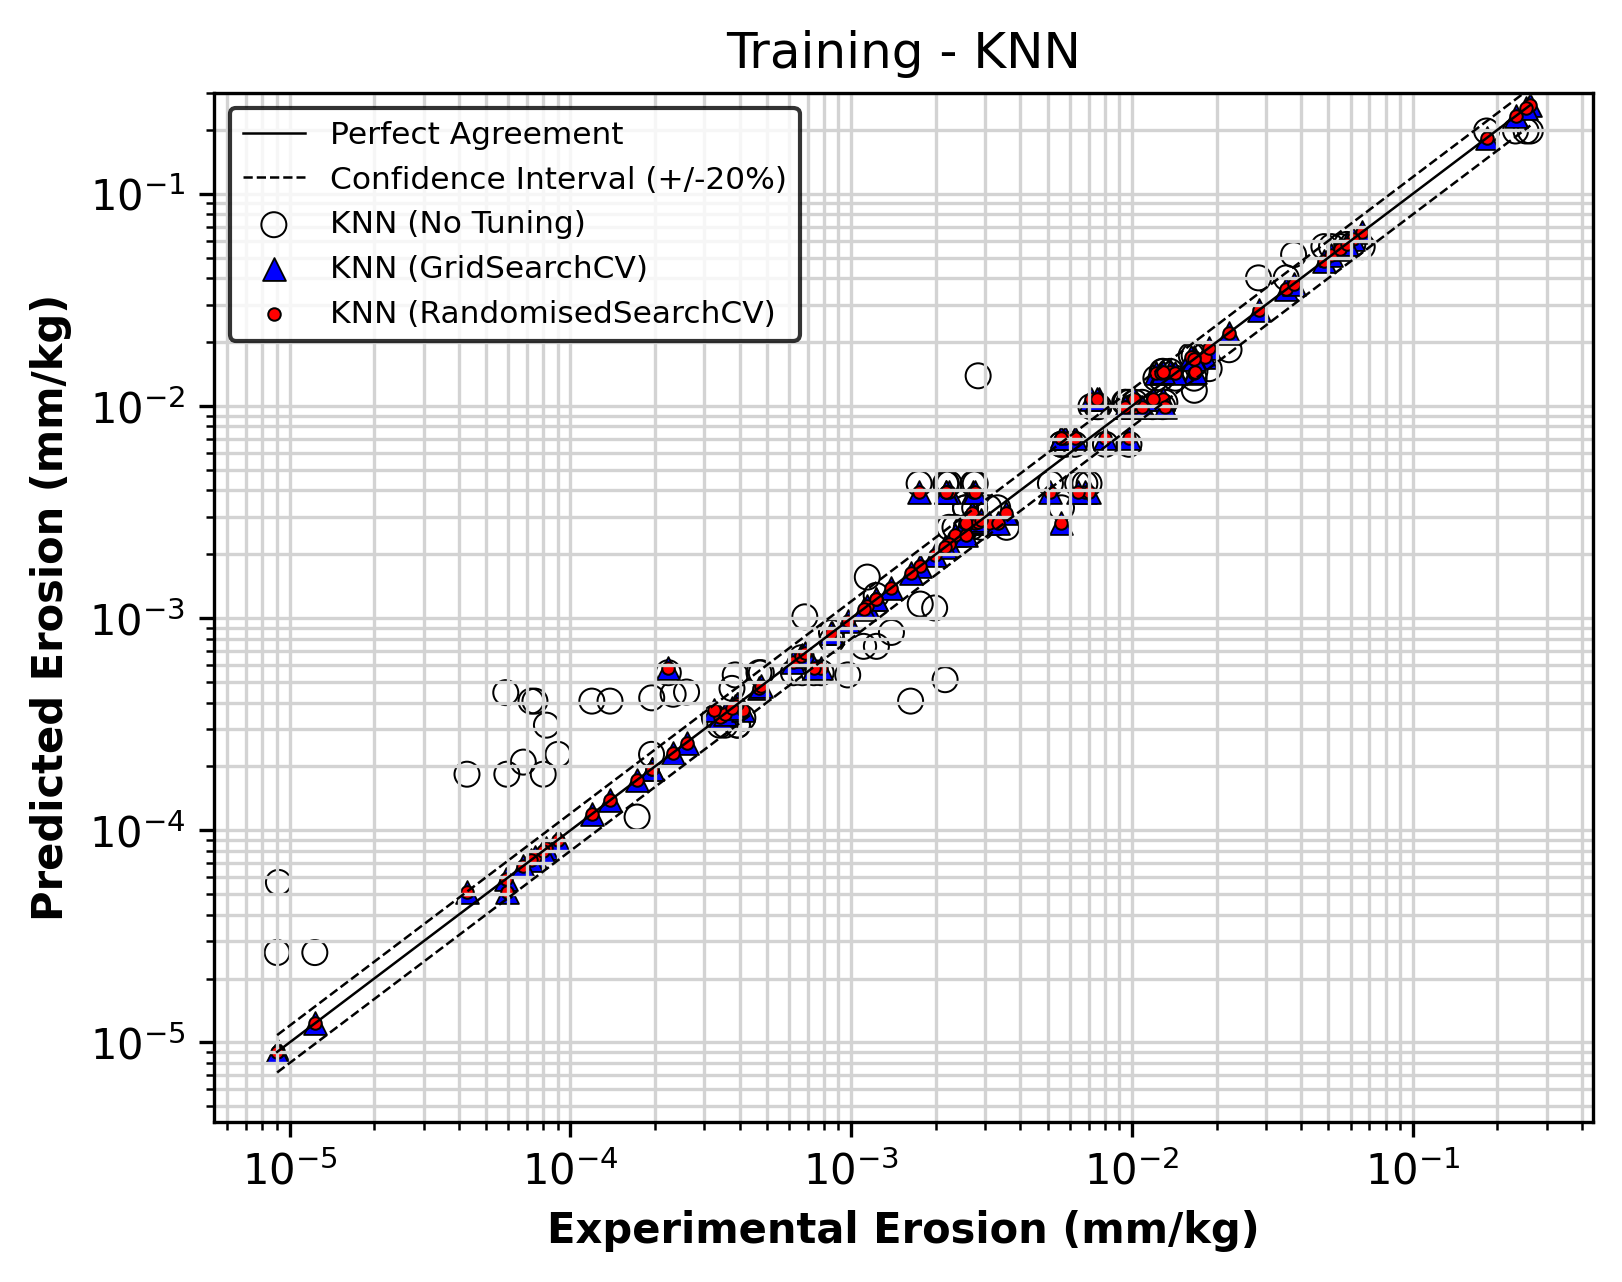

In [ ]:
# plotting the observed and predicted
fig = plt.figure(figsize=(15,20), dpi=300)

plt.subplot(5,3,1)
sns.lineplot(x=y_train, y=y_train, linestyle='-', linewidth=0.6, label = 'Perfect Agreement', color ='k').set(xscale='log', yscale='log')
sns.lineplot(x=y_train, y=y_minus20p_Tr, color ='k', linestyle = 'dashed',  dashes=(1,15),  linewidth=0.6, label = 'Confidence Interval (+/-20%)').set(xscale='log', yscale='log')
sns.lineplot(x=y_train, y=y_plus20p_Tr, color ='k', linestyle = 'dashed',  dashes=(1,15),  linewidth=0.6).set(xscale='log', yscale='log')
sns.scatterplot(x=y_train, y=ytrain_pred_knnreg, marker='o', facecolors='none', edgecolors='k', label = 'KNN (No Tuning)').set(xscale='log', yscale='log')
sns.scatterplot(x=y_train, y=ytrain_pred_hyper_Grid_knnreg, marker='^', facecolors='b', edgecolors='k', s=30, label = 'KNN (GridSearchCV)').set(xscale='log', yscale='log')
sns.scatterplot(x=y_train, y=ytrain_pred_hyper_Rand_knnreg, marker='.', facecolors='r', edgecolors='k', label = 'KNN (RandomisedSearchCV)').set(xscale='log', yscale='log')
plt.title('Training - KNN')
plt.ylabel('Predicted Erosion (mm/kg)', weight='bold')
plt.xlabel('Experimental Erosion (mm/kg)', weight='bold')
plt.ylim(top=0.3)
# plt.xlim(0, 1.6e-3)
plt.legend(frameon=True, facecolor='white', edgecolor='k', fontsize=7.5)
plt.grid(True, which="both", ls="-",c='#D3D3D3')
plt.tight_layout()
plt.show()

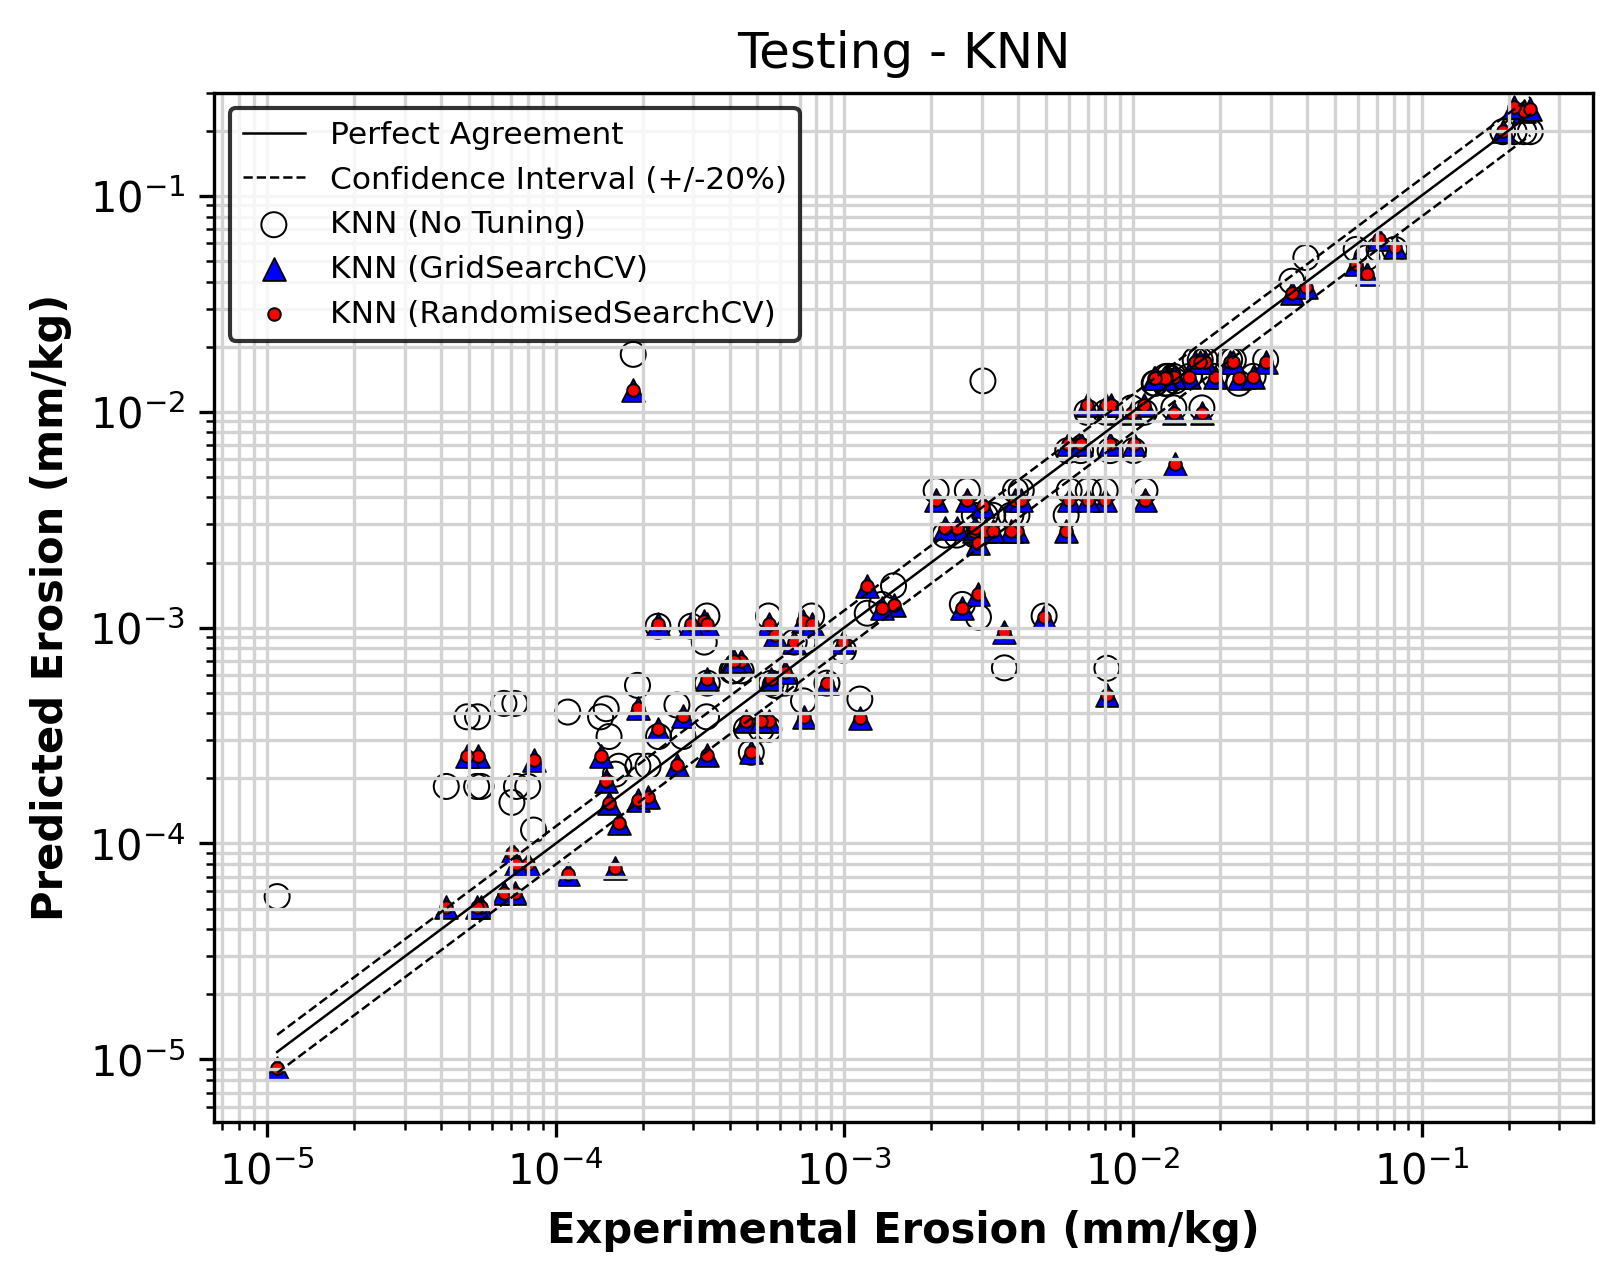

In [ ]:
# plotting the observed and predicted
fig = plt.figure(figsize=(15,20), dpi=300)

plt.subplot(5,3,1)
sns.lineplot(x=y_test, y=y_test, linestyle='-', linewidth=0.6, label = 'Perfect Agreement', color ='k').set(xscale='log', yscale='log')
sns.lineplot(x=y_test, y=y_minus20p_Te, color ='k', linestyle = 'dashed',  dashes=(1,15),  linewidth=0.6, label = 'Confidence Interval (+/-20%)').set(xscale='log', yscale='log')
sns.lineplot(x=y_test, y=y_plus20p_Te, color ='k', linestyle = 'dashed',  dashes=(1,15),  linewidth=0.6).set(xscale='log', yscale='log')
sns.scatterplot(x=y_test, y=ytest_pred_knnreg, marker='o', facecolors='none', edgecolors='k', label = 'KNN (No Tuning)').set(xscale='log', yscale='log')
sns.scatterplot(x=y_test, y=ytest_pred_hyper_Grid_knnreg, marker='^', facecolors='b', edgecolors='k', s=30, label = 'KNN (GridSearchCV)').set(xscale='log', yscale='log')
sns.scatterplot(x=y_test, y=ytest_pred_hyper_Rand_knnreg, marker='.', facecolors='r', edgecolors='k', label = 'KNN (RandomisedSearchCV)').set(xscale='log', yscale='log')
plt.title('Testing - KNN')
plt.ylabel('Predicted Erosion (mm/kg)', weight='bold')
plt.xlabel('Experimental Erosion (mm/kg)', weight='bold')
plt.ylim(top=0.3)
# plt.xlim(0, 1.6e-3)
plt.legend(frameon=True, facecolor='white', edgecolor='k', fontsize=7.5)
plt.grid(True, which="both", ls="-",c='#D3D3D3')
plt.tight_layout()
plt.show()

# SAVING & LOADING THE TRAINED MODEL

In [ ]:
### SAVING THE TRAINED MODEL - CHANGE LOCATION TO PREFERRED

import joblib

#Saving models - Untuned

# joblib.dump(dtreg, 'location/preferred_filename.joblib')
# joblib.dump(rfreg, 'drive/MyDrive/ML/Imperial/MLData/2Phase/Saved_Models/RandomForest_ElbowMix50T_RS5_FINAL_UnTuned.joblib')
# joblib.dump(lnreg, 'location/preferred_filename.joblib.joblib')
# joblib.dump(knnreg, 'location/preferred_filename.joblib.joblib')

# #Saving models - Tuned

# joblib.dump(best_regressor_Grid_dtreg, 'location/preferred_filename.joblib.joblib')
# joblib.dump(best_regressor_Rand_dtreg, 'location/preferred_filename.joblib.joblib')
# joblib.dump(best_regressor_Grid_rfreg, 'location/preferred_filename.joblib.joblib')
# joblib.dump(best_regressor_Rand_rfreg, 'location/preferred_filename.joblib.joblib')
# joblib.dump(best_regressor_Grid_knnreg, 'location/preferred_filename.joblib.joblib')
# joblib.dump(best_regressor_Rand_knnreg, 'location/preferred_filename.joblib.joblib')

# loading the saved model - Untuned

import joblib

# reg_dt = joblib.load('location/preferred_filename.joblib.joblib')
# reg_rf = joblib.load('location/preferred_filename.joblib.joblib')
# reg_ln = joblib.load('location/preferred_filename.joblib.joblib')
# reg_knn = joblib.load('location/preferred_filename.joblib.joblib')

# # loading the saved model - Tuned

# reg_dt_hyper_Grid = joblib.load('location/preferred_filename.joblib.joblib')
# reg_dt_hyper_Rand = joblib.load('location/preferred_filename.joblib.joblib')
# reg_rf_hyper_Grid = joblib.load('location/preferred_filename.joblib.joblib')
# reg_rf_hyper_Rand = joblib.load('location/preferred_filename.joblib.joblib')
# reg_knn_hyper_Grid = joblib.load('location/preferred_filename.joblib.joblib')
# reg_knn_hyper_Rand = joblib.load('location/preferred_filename.joblib.joblib')


# EROSION PREDICTION